# Lab 8:  Coupled oscillators

- **Goal**: introduce normal modes, beats, and energy propagation.
- Consider a one-dimensional chain of $N$ particles each of mass
  $m$ with equal equilibrium separation $a$. 
- Particles are coupled by massless springs with force constant
  $k_c$, except for the two end springs which have spring constant
  $k$.
- Let $u_i$ be the displacement from equilibrium of the $i$th mass
  along the axis of the system.
- The ends of the left- and right-hand springs are assumed fixed.
- Boundary conditions
\begin{equation*}
u_0 = u_{N+1} = 0
\end{equation*}
- The equation of motion for the $i$th particle is
\begin{eqnarray*}
m \frac{ d^2u_i}{dt^2} &=& -k_c(u_i - u_{i+1}) - k_c(u_i - u_{i-1})\\
& = & -k_c(2 u_i - u_{i+1} - u_{i-1})
\end{eqnarray*}
- The equations for particles $i$ = 1 and $N$ next to the walls
  are given by
\begin{eqnarray*}
m \frac{ d^2u_1}{dt^2} &=& -k_c(u_1 - u_{2}) - ku_1\\
m \frac{ d^2u_N}{dt^2} & = & -k_c(u_N - u_{N-1} - ku_{N})
\end{eqnarray*}
-  The above equations of motion describe {\em longitudinal}
  oscillations, i.e., motion along the length of the system.

## Exercise 1:  

Study the code below and comment as necessary.  The animation methods do not work in Notebook (but do from the command line).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from matplotlib import rc
rc('animation', html='jshtml')

class N_chain:

    def __init__(self,N,m,kc,k,omega_0):
        self.N = N
        self.x = np.zeros(N)
        self.v = np.zeros(N)
        self.m = m
        self.kc = kc
        self.k = k
        self.omega_0 = omega_0
        self.fund_vel = 0
        self.xarr = []
        self.varr = []
        self.time = []
        self.energy = []
        
    #ODE for left most mass
    def F0(self,x,v,t):
        return np.array([v,-self.kc*(x[1] - x[2]) - self.k*x[1] + (0.5*self.kc)*np.cos(self.omega_0*t)])
    
    #ODE for right most mass
    def FN(self,x,v,t):
        return np.array([v,-self.kc*(x[1] - x[0]) - self.k*x[1]])

    #ODE for masses inbetween
    def Fi(self,x,v,t):
        return np.array([v,-self.kc*(2*x[1] - x[2] - x[0])])

    #RK4 step
    def rk4_step(self,F,x,v,t):
        k1 = dt*F(x,v,t)         
        k2 = dt*F(x + 0.5*k1[0], v + 0.5*k1[1],t)
        k3 = dt*F(x + 0.5*k2[0], v + 0.5*k2[1],t)
        k4 = dt*F(x + k3[0], v + k3[1],t)
        x[1] = x[1] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6.
        v = v + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6.
        return x[1],np.array(v)
    
    #Chained mass solver
    def rk4_chain(self,tfinal,dt):  
        t = 0.0
        while t < tfinal+dt:
            xn = self.x
            vn = self.v
            self.time.append(t)
            for i in range(len(self.x)):
                self.xarr.append(self.x[i])
                self.varr.append(self.v[i])
            self.x[0],self.v[0] = self.rk4_step(self.F0, np.array([0,xn[0],xn[1]]),vn[0],t)
            self.x[self.N-1],self.v[self.N-1] = self.rk4_step(self.FN,np.array([xn[self.N-2],xn[self.N-1],0]),vn[self.N-1],t)
            self.energy.append(0.5*self.m*vn[0]**2 + 0.5*self.k*xn[1]**2)
            if (self.N > 2):
                for i in range(1,self.N-1):
                    self.x[i],self.v[i] = self.rk4_step(self.Fi,np.array([xn[i-1],xn[i],xn[i+1]]),vn[i],t)
                    self.energy.append(0.5*self.m*vn[i]**2 + 0.5*self.k*xn[i-1]**2 + 0.5*self.k*xn[i+1]**2)   
            self.energy.append(0.5*self.m*vn[self.N-1]**2 + 0.5*self.k*xn[self.N-2]**2)         
            t = t + dt           
    '''
    def animate(self,nstep): #only plots for two or three masses        
        lines=[]
        fig, ax = plt.subplots()
        for i in range(0,int(len(self.xarr)/self.N),N*nstep):
            p1 = ax.plot(self.xarr[i]+1, 0., 'bo', \
                      self.xarr[i+1]+2, 0., 'ro', \
                      self.xarr[i+2]+3, 0., 'co', \
                             markersize=10)
            lines.append(p1)
            ax.set_aspect('equal')
            ax.set_ylim(-0.2,0.2)
        ani = animation.ArtistAnimation(fig, lines, interval=10)
        plt.show()

    def animate10(self,nstep): #only plots for 10 masses        
        lines=[]
        fig, ax = plt.subplots()
        for i in range(0,int(len(self.xarr)/self.N),N*nstep):
            p1 = ax.plot(self.xarr[i]+1, 0., 'ro', \
                         self.xarr[i+1]+2, 0., 'ro', \
                         self.xarr[i+2]+3, 0., 'ro', \
                         self.xarr[i+3]+4, 0., 'ro', \
                         self.xarr[i+4]+5, 0., 'ro', \
                         self.xarr[i+5]+6, 0., 'ro', \
                         self.xarr[i+6]+7, 0., 'ro', \
                         self.xarr[i+7]+8, 0., 'ro', \
                         self.xarr[i+8]+9, 0., 'ro', \
                         self.xarr[i+9]+10, 0., 'ro', \
                             markersize=5)
            lines.append(p1)
            ax.set_aspect('equal')
            ax.set_ylim(-0.2,0.2)
        ani = animation.ArtistAnimation(fig, lines, interval=10)
        plt.show()
    '''
    def animate_func(self,nstep): #only plots for two or three masses
        fig, ax = plt.subplots()
        line, = ax.plot([],[],'r.',markersize=10)
        ax.set_aspect('equal')
        ax.set_ylim(-0.2,0.2)
        ax.set_xlim(-0.5,self.N)
        ax.set_xlabel('x')
        #data = np.empty(self.N,int(len(self.xarr)/self.N))
        data = []
        def update_line(i):
            line.set_ydata(0.0)
            line.set_xdata(data[i:i+self.N])
            return line,
        for i in range(0,int(len(self.xarr)/self.N),self.N*nstep):
            for j in range(self.N):
                #data[i,j]=self.xarr[i+j]+j
                data.append(self.xarr[i+j]+j)
        nfrm = int(len(self.xarr)/(self.N*nstep))
        print(nfrm)
        ani = animation.FuncAnimation(fig, update_line, frames=nfrm, interval=10, blit=True, repeat=True,cache_frame_data=True)
        return ani 

    def plot_N_masses(self):
        fig, axs = plt.subplots(self.N)
        for i in range(self.N):
            axs[i].plot(self.time, self.xarr[i::self.N])
            axs[i].set(xlabel='time', ylabel='u'+str(i))
        for ax in axs.flat:
            ax.label_outer()
        plt.show()
    
    def plot_energy(self):
        plt.figure()
        for i in range(self.N):
            plt.plot(self.time, self.energy[i::self.N], label='u'+str(i))
            plt.xlabel('time')
            plt.ylabel('energy')
        plt.legend()
        
    def plot_normal_modes(self):
        plt.figure()
        omega_H = np.sqrt((k+2*kc)/mass)
        omega_L = np.sqrt(k/mass)
        plt.plot(self.time, np.cos(np.multiply(self.time, omega_H)), label='Omega_H')
        plt.plot(self.time, np.cos(np.multiply(self.time, omega_L)), label='Omega_L')
        plt.plot(self.time, np.cos(np.multiply(self.time, omega_H)) + np.cos(np.multiply(self.time, omega_L)), label='Omega_H + Omega_L')
        plt.legend()
    
    def plot_normal_modes_driven(self):
        plt.figure(1)
        normal_modes_d = []
        for i in range(self.N):
          omega_n = np.sqrt((4*k/self.m) * np.sin((i+1)*np.pi/(2*(self.N + 1))))
          normal_modes_d.append(np.cos(np.multiply(self.time, omega_n)))
          plt.plot(self.time, np.cos(np.multiply(self.time, omega_n)), label='Omega_' + str(i+1))
        plt.legend()
        plt.figure(2)
        normal_superpositions = 0
        for i in range(self.N):
            normal_superpositions += normal_modes_d[i]
        plt.plot(self.time, normal_superpositions, label='Superposition of all normal modes')
        plt.legend()
#-------------------------------------------------------------------------------

## Exercise 2: Motion of two coupled oscillators

Investigate the motion of two masses.  Set the velocities of both particles equal to zero for all runs in this problem.  

1. Choose initial conditions $u_1(0) = 0.5$, $u_2(0) = 0$ and compute the time-dependence of $u_1$ and $u_2$ for a) $k= 1$ and $k_c = 0.8$ and b) $k= 1$ and $k_c = 1$.  Determine reasonable values for the time step $\Delta t$ and the time of the run, $tmax$.  (Set the mass of the particles to unity.)  Is it possible to define a period of motion in the first case?  What is the period of motion in the second case?

2. Set $k= 1$ and $k_c = 0.2$.  This is a case of *weak coupling*.  Can you identify two kinds of oscillations superimposed upon each other?  

3. Choose initial conditions $u_1(0) = 0.5$, $u_2(0) = 0.5$ so that both particles have equal displacements. Set $k= 1$ and $k_c = 0.1$. Describe the observed motion.  Compute the energy (kinetic plus potential) of each particle.  Does the period of motion depend on $k_c$?  What is the dependence of motion on $k$?

4. Consider initial conditions $u_1(0) = 0.5$, $u_2(0) = -0.5$ so that both particles have equal but *opposite* displacements.  Determine the dependence of $\omega^2$ on $k$ and $k_c$.

5. Discuss your results in terms of *normal modes*.

Part 1.a: kc = 0.8, k = 1
100
Part 1.b: kc = 1, k = 1
100
Part 2.a: kc = 0.2, k = 1 w/ Plotted Normal Modes
Part 3: kc = 0.2, k = 1
Part 4: kc = 0.2, k = 1, Opposite Displacments


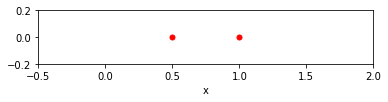

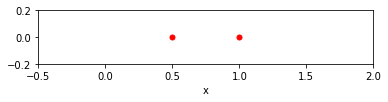

In [ ]:
#Initial Conditions:
num_of_masses = 2

t_final = 50
dt = 0.005

mass = 1
omega_0 = 0
#-------------------------------------------------------------------------------
#Part a:
kc = 0.8
k = 1

#Initialization 
coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
coupled_oss.x[0] = 0.5
coupled_oss.rk4_chain(t_final,dt)
print("Part 1.a: kc = 0.8, k = 1")
coupled_oss.animate_func(100)
#coupled_oss.plot_N_masses()
#-------------------------------------------------------------------------------
#Part b:
kc = 1
k = 1

coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
coupled_oss.x[0] = 0.5
coupled_oss.rk4_chain(t_final,dt)
print("Part 1.b: kc = 1, k = 1")
coupled_oss.animate_func(100)
#coupled_oss.plot_N_masses()
#-------------------------------------------------------------------------------
#Part 2:
kc = .2
k = 1

timespace = np.arange(0,t_final+dt,dt)

coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
coupled_oss.x[0] = 0.5
coupled_oss.rk4_chain(t_final,dt)
print("Part 2.a: kc = 0.2, k = 1 w/ Plotted Normal Modes")
#coupled_oss.animate_func(100)
#coupled_oss.plot_N_masses()

#Superposition of the normal modes
#coupled_oss.plot_normal_modes()

#-------------------------------------------------------------------------------
#Part 3:
kc = .1
k = 1

coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
coupled_oss.x[0] = 0.5
coupled_oss.x[1] = 0.5
coupled_oss.rk4_chain(t_final,dt)
print("Part 3: kc = 0.2, k = 1")
#coupled_oss.animate_func(100)
#coupled_oss.plot_N_masses()
#coupled_oss.plot_energy()

#Does the period of motion depend on kc?  
#Yes.
#What is the dependence of motion on k?
#With this equation here: 
period = mass/np.sqrt((k+2*kc)/mass)
#-------------------------------------------------------------------------------
#Part 4:
kc = .5
k = 1

period = mass/np.sqrt((k+2*kc)/mass)
#omega_0 = omega_H

coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
coupled_oss.x[0] = 0.5
coupled_oss.x[1] = -0.5
coupled_oss.rk4_chain(t_final,dt)
print("Part 4: kc = 0.2, k = 1, Opposite Displacments")
#coupled_oss.animate_func(100)
#coupled_oss.plot_N_masses()
#coupled_oss.plot_energy()
#Determine Dependence of omega2 on k, and kc

## Exercise 3: 

1. Run the program with $N= 3$, $k_c = 0.2$, $k = 1$ and arbitrary but non-zero initial displacements. Describe the time-dependence of the displacements of the particles.

2. Now consider the following three cases and discuss the results in the context of *normal modes*:

| | $u_0(1)$ | $u_0(2)$ | $u_0(3)$ |
|-------------:|--------------:|-------------:|-----------:|
|case 1 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 |
|case 2 | 0.5 | -0.5 | 0.5 |
|case 3 | 0.5 | 0 | -0.5|

What are the normal mode frequencies?

3. Add an external driving force to particle 1 and determine the normal mode frequencies.  Compare with the results from part 2.

4.  Repeat part 3, but with $N=10$ and $k = k_c = 1$. Try values of $\omega$ in the range $0.2\sqrt{k/m}$ to $3 \sqrt{k/m}$ to find at least one resonance.  Verify a few cases with the following analytical result for the normal frequencies

\begin{equation*}
\omega_n^2 = \frac{4 k}{m} \sin^2\frac{n \pi}{2(N+1)}.
\end{equation*}

5.  Perturb the chain at one end (e.g., $u_1(0) = 1$) and determine the time it takes to for a disturbance to travel a given distance.  This illustrates the propagation of energy.  Estimate $v$.  Consider larger values of $N$ to ensure that your estimate is independent of $N$.

Case 1:


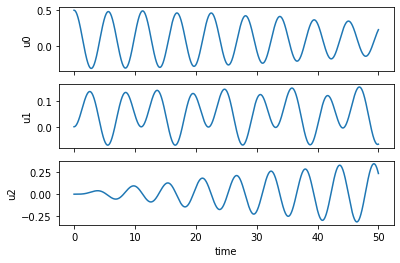

Case 1:


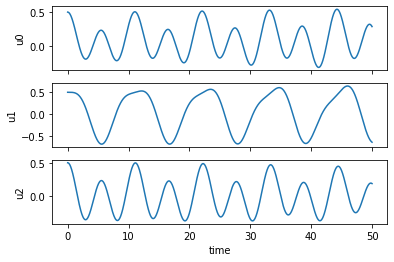

Case 2:


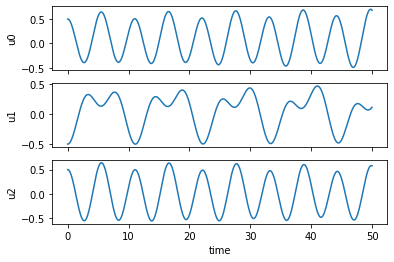

Case 3:


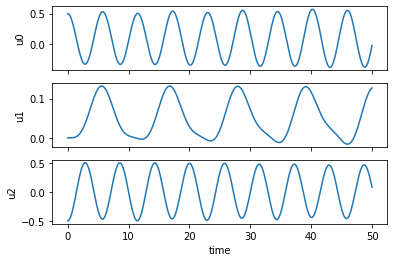

Part 3:
Part 4:
Part 5:


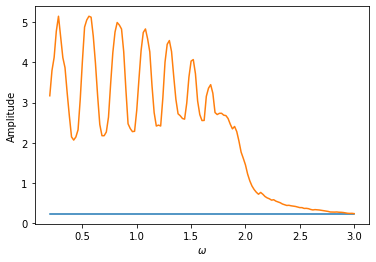

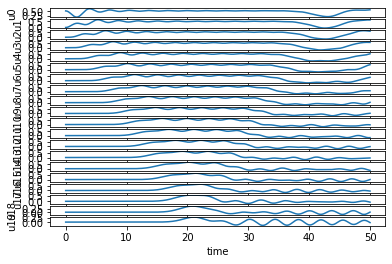

In [ ]:
#Exercise 3:
#-------------------------------------------------------------------------------
#Part 1:
print("Case 1:")
num_of_masses = 3
kc = 0.2
k = 1
omega_0 = 0

t_final = 50

coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
coupled_oss.x[0] = 0.5
coupled_oss.rk4_chain(t_final,dt)
coupled_oss.plot_N_masses()

#-------------------------------------------------------------------------------
#Three Masses:
#Case 1:
print("Case 1:")
num_of_masses = 3
kc = 0.2
k = 1

period = mass/np.sqrt((k+2*kc)/mass)
tfinal = 2*period

coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
coupled_oss.x[0] = 0.5
coupled_oss.x[1] = 0.5
coupled_oss.x[2] = 0.5
coupled_oss.rk4_chain(t_final,dt)
coupled_oss.plot_N_masses()
#-------------------------------------------------------------------------------
#Case 2:
print("Case 2:")
num_of_masses = 3
kc = 0.2
k = 1

period = mass/np.sqrt((k+2*kc)/mass)
tfinal = 2*period

coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
coupled_oss.x[0] = 0.5
coupled_oss.x[1] = -0.5
coupled_oss.x[2] = 0.5
coupled_oss.rk4_chain(t_final,dt)
coupled_oss.plot_N_masses()
#-------------------------------------------------------------------------------
#Case 3:
print("Case 3:")
num_of_masses = 3
kc = 0.2
k = 1

period = mass/np.sqrt((k+2*kc)/mass)
tfinal = 2*period

coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
coupled_oss.x[0] = 0.5
coupled_oss.x[1] = 0
coupled_oss.x[2] = -0.5
coupled_oss.rk4_chain(t_final,dt)
coupled_oss.plot_N_masses()
#coupled_oss.plot_normal_modes()
#-------------------------------------------------------------------------------
#Part 3: adding driving frequency
print("Part 3:")
num_of_masses = 3
kc = 0.2
k = 1
tfinal = 50;

omega_0s = np.arange(0.2*np.sqrt(k/mass),3*np.sqrt(k/mass) + dt, dt) * np.sqrt(k/mass)
max_amp_coupled_oss = []

for i in range(len(omega_0s)):
  coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0) 
  coupled_oss.rk4_chain(t_final,dt)
  max_amp_coupled_oss.append(abs(np.max(coupled_oss.xarr)-np.min(coupled_oss.xarr)))

plt.plot(omega_0s,max_amp_coupled_oss)
plt.xlabel('$\omega$')
plt.ylabel('Amplitude')
#-------------------------------------------------------------------------------
#Part 4
print("Part 4:")
num_of_masses = 10
kc = 1
k = 1
dt = 0.02

omega_0s = np.arange(0.2*np.sqrt(k/mass),3*np.sqrt(k/mass) + dt, dt) * np.sqrt(k/mass)
max_amp_coupled_oss = []

for i in range(len(omega_0s)):
  coupled_oss = N_chain(num_of_masses,mass,kc,k,omega_0s[i]) 
  coupled_oss.rk4_chain(t_final,dt)
  max_amp_coupled_oss.append(abs(np.max(coupled_oss.xarr)-np.min(coupled_oss.xarr)))

plt.plot(omega_0s,max_amp_coupled_oss)
plt.xlabel('$\omega$')
plt.ylabel('Amplitude')
#-------------------------------------------------------------------------------
#Part 5
print("Part 5:")
num_of_masses = 10
kc = 1
k = 1
omega_0 = 0
t_final = 10

#Changed this and found 10 to be the time for 10 masses but when 
#  I increase the masses to 15 it increased the time to 12 and 
#  if I increase it to 20 it increases to 20 secounds.
#How I'm calculating it is watching when the 
#   maximum amplitute reaches the final mass

co = N_chain(num_of_masses,mass,kc,k,omega_0)
co.x[0]=0.5
co.rk4_chain(tfinal,dt)
co.plot_N_masses()